In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import copy
from sklearn.metrics import r2_score
import random
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy.matlib 
from sklearn.model_selection import StratifiedKFold
from scipy.stats import hmean
from sklearn import metrics

In [2]:
numpy.random.seed(21)

In [3]:
data = pd.read_csv('.\\Data\\train.csv')
data_test = pd.read_csv('.\\Data\\test.csv')

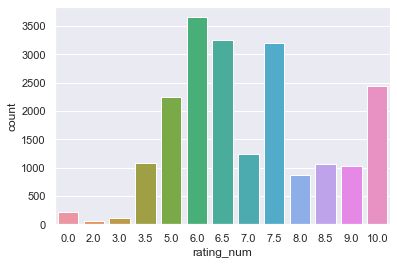

In [4]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="rating_num", data=data)

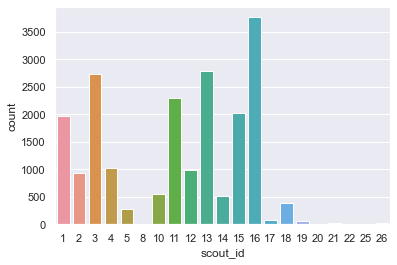

In [5]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="scout_id", data=data)

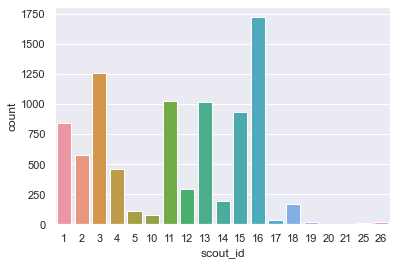

In [6]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="scout_id", data=data_test)

[ 8  5  4  7  9 10  6 11 14 15]


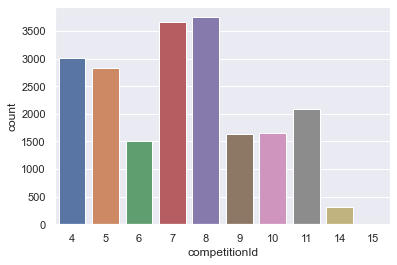

In [7]:
print(data.competitionId.unique())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="competitionId", data=data)

[ 8  5  4  7  9 10  6 11 14 15]


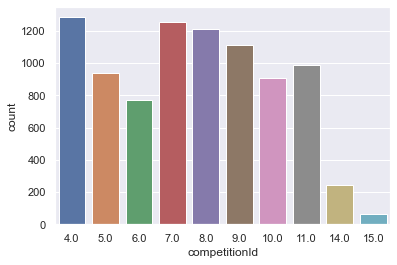

In [8]:
print(data.competitionId.unique())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="competitionId", data=data_test)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, nan, 20.0, 22.0, 23.0]


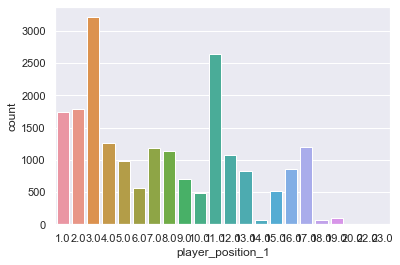

In [9]:
print(sorted(data.player_position_1.unique()))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="player_position_1", data=data)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, nan, 20.0, 22.0, 23.0]


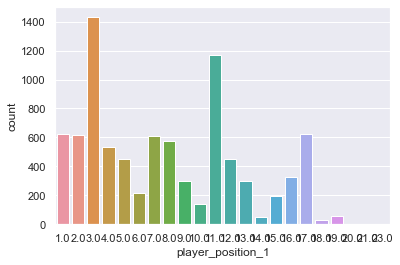

In [10]:
print(sorted(data.player_position_1.unique()))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="player_position_1", data=data_test)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, nan, 20.0, 22.0, 23.0]


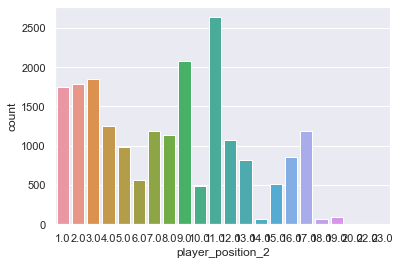

In [11]:
print(sorted(data.player_position_2.unique()))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="player_position_2", data=data)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, nan, 20.0, 22.0, 23.0]


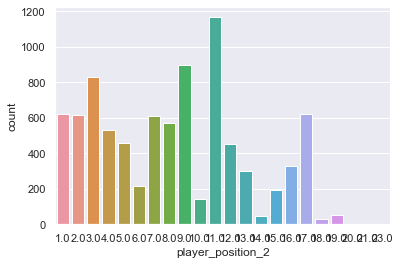

In [12]:
print(sorted(data.player_position_2.unique()))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="player_position_2", data=data_test)

<AxesSubplot:xlabel='player_height', ylabel='Count'>

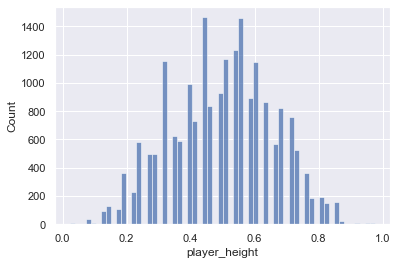

In [13]:
sns.histplot(data=data, x="player_height")

<AxesSubplot:xlabel='player_height', ylabel='Count'>

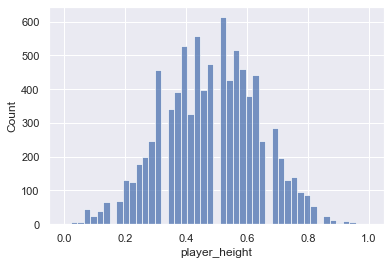

In [14]:
sns.histplot(data=data_test, x="player_height")

In [15]:
# observando as variaveis fornecidas
nn = list(data)
nn.remove('rating_num')
f = data[nn].nunique()
ff = data_test.nunique()
kk = 0
for x in nn:
    print(f[x],' ',x,' ', ff[kk], 'k :',kk-1)
    if ((f[x]) < 10) & ((f[x]) > 0):
       
        print( (data[x].unique()) )
        print ( (data_test[x].unique()) )
    kk = kk+1

20453   row_id   8774 k : -1
21   scout_id   19 k : 0
3   winner   3 k : 1
['winner' 'loser' 'draw']
['draw' 'loser' 'winner']
2   team   2 k : 2
['team1' 'team2']
['team1' 'team2' nan]
10   competitionId   10 k : 3
22   player_position_1   22 k : 4
22   player_position_2   22 k : 5
39   player_height   42 k : 6
46   player_weight   45 k : 7
6   player_general_var_0   6 k : 8
[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.2 0.4 0.6 0.8 1. ]
2   player_general_var_1   2 k : 9
[0 1]
[0 1]
101   player_general_var_2   101 k : 10
61   player_general_var_3   35 k : 11
93   player_general_var_4   96 k : 12
4   player_general_var_5   5 k : 13
[0.   0.25 0.5  0.75]
[0.   0.25 0.5  0.75 1.  ]
6   player_positional_raw_var_0   5 k : 14
[0.         0.16666667 0.33333333        nan 0.5        1.
 0.66666667]
[0.16666667 0.                nan 0.33333333 0.5        0.66666667]
5   player_positional_raw_var_1   3 k : 15
[0.   0.5  0.25  nan 0.75 1.  ]
[0.   0.25  nan 0.5 ]
5   player_positional_raw_var_2   5 k : 1

[0.         0.14285714 0.28571429        nan 0.42857143 0.85714286
 0.57142857]
14   player_other_raw_var_139   12 k : 153
134   player_other_raw_var_140   119 k : 154
126   player_other_raw_var_141   109 k : 155
114   player_other_raw_var_142   104 k : 156
34   player_general_raw_var_143   29 k : 157
15   player_other_raw_var_144   14 k : 158
9   player_offensive_raw_var_145   9 k : 159
[0.         0.18181818 0.09090909 0.36363636 0.45454545 0.27272727
        nan 0.72727273 0.54545455 0.63636364]
[0.         0.45454545 0.09090909 0.18181818        nan 0.27272727
 0.36363636 0.54545455 0.72727273 0.63636364]
10   player_other_raw_var_146   9 k : 160
15   player_other_raw_var_147   14 k : 161
13   player_offensive_raw_var_148   11 k : 162
13   player_other_raw_var_149   11 k : 163
2   player_offensive_raw_var_150   1 k : 164
[ 0. nan  1.]
[ 0. nan]
7   player_offensive_raw_var_151   7 k : 165
[0.         0.14285714 0.28571429        nan 0.42857143 0.57142857
 0.71428571 0.85714286]
[0.

3655   player_defensive_derived_var_49   2544 k : 349
2677   player_offensive_derived_var_50   1435 k : 350
16798   player_other_derived_var_51   7830 k : 351
16371   player_offensive_derived_var_52   7517 k : 352
1350   player_positional_derived_var_53   500 k : 353
3161   player_physical_derived_var_54   2126 k : 354
17031   player_offensive_derived_var_55   7922 k : 355
15733   player_offensive_derived_var_56   7568 k : 356
15058   player_positional_derived_var_57   7335 k : 357
1917   player_defensive_derived_var_58   1467 k : 358
10166   player_physical_derived_var_59   4299 k : 359
1053   player_offensive_derived_var_60   579 k : 360
192   player_other_derived_var_61   101 k : 361
9898   player_physical_derived_var_62   4266 k : 362
2989   player_offensive_derived_var_63   1391 k : 363
12589   player_positional_derived_var_64   6797 k : 364
6324   player_defensive_derived_var_65   3355 k : 365
12953   player_defensive_derived_var_66   6291 k : 366
1260   player_defensive_derived_

84   team1_other_ratio_var_46   80 k : 603
65   team1_other_ratio_var_47   63 k : 604
500   team1_offensive_ratio_var_48   470 k : 605
34   team1_other_ratio_var_49   33 k : 606
41   team1_other_ratio_var_50   37 k : 607
36   team1_other_ratio_var_51   35 k : 608
9   team1_other_ratio_var_52   9 k : 609
[0.    0.25  0.125   nan 0.5   0.375 0.75  0.625 0.875 1.   ]
[0.5   0.    0.25  0.125   nan 0.375 0.625 0.75  1.    0.875]
3571   team1_offensive_derived_var_0   2444 k : 610
224   team1_defensive_derived_var_1   206 k : 611
3817   team1_defensive_derived_var_2   2572 k : 612
2948   team1_defensive_derived_var_3   2135 k : 613
2901   team1_offensive_derived_var_4   2163 k : 614
1143   team1_offensive_derived_var_5   1018 k : 615
444   team1_defensive_derived_var_6   364 k : 616
561   team1_offensive_derived_var_7   455 k : 617
3073   team1_defensive_derived_var_8   2214 k : 618
286   team1_defensive_derived_var_9   269 k : 619
2111   team1_defensive_derived_var_10   1684 k : 620
3828  

In [16]:
'''
data['dummy1'] = np.random.randn(len(data),1)/5
data['dummy2'] = np.random.randn(len(data),1)/5
data['dummy3'] =  np.random.randn(len(data),1)/5
data['dummy4'] = np.random.randn(len(data),1)/5
data['dummy5'] = np.random.randn(len(data),1)/5
data['dummy6'] = np.random.randn(len(data),1)/5
data['dummy7'] = np.random.randn(len(data),1)/5
data['dummy8'] = np.random.randn(len(data),1)/5
data['dummy9'] = np.random.randn(len(data),1)/5
data['dummy10'] = np.random.randn(len(data),1)/5
'''

"\ndata['dummy1'] = np.random.randn(len(data),1)/5\ndata['dummy2'] = np.random.randn(len(data),1)/5\ndata['dummy3'] =  np.random.randn(len(data),1)/5\ndata['dummy4'] = np.random.randn(len(data),1)/5\ndata['dummy5'] = np.random.randn(len(data),1)/5\ndata['dummy6'] = np.random.randn(len(data),1)/5\ndata['dummy7'] = np.random.randn(len(data),1)/5\ndata['dummy8'] = np.random.randn(len(data),1)/5\ndata['dummy9'] = np.random.randn(len(data),1)/5\ndata['dummy10'] = np.random.randn(len(data),1)/5\n"

In [17]:
nomes = list(data)

nomes.remove('rating_num')
nomes.remove('row_id')

# no values vars

nomes.remove('team1_other_raw_var_19')
nomes.remove('team1_other_raw_var_31')
nomes.remove('team1_other_raw_var_33')
nomes.remove('team1_other_raw_var_38')
nomes.remove('team1_other_raw_var_40')
nomes.remove('team1_other_raw_var_43')
nomes.remove('team1_other_raw_var_50')
nomes.remove('team1_other_raw_var_51')
nomes.remove('team1_other_raw_var_72')
nomes.remove('team1_other_raw_var_82')
nomes.remove('team1_other_raw_var_92')
nomes.remove('team1_other_ratio_var_32')
nomes.remove('team1_other_ratio_var_33')
nomes.remove('team2_other_raw_var_19')
nomes.remove('team2_other_raw_var_31')
nomes.remove('team2_other_raw_var_33')
nomes.remove('team2_other_raw_var_38')
nomes.remove('team2_other_raw_var_40')
nomes.remove('team2_other_raw_var_43')
nomes.remove('team2_other_raw_var_50')
nomes.remove('team2_other_raw_var_51')
nomes.remove('team2_other_raw_var_72')
nomes.remove('team2_other_raw_var_82')
nomes.remove('team2_other_raw_var_92')
nomes.remove('team2_other_ratio_var_32')
nomes.remove('team2_other_ratio_var_33')

dict = {"loser" : 0, "draw" : 1, "winner" : 2}
data=data.replace({"winner": dict})
data_test=data_test.replace({"winner": dict})

dict = {"team1" : 0, "team2" : 1}
data=data.replace({"team": dict})     
data_test=data_test.replace({"team": dict})

In [18]:
data_test.dtypes[:10]

row_id                    int64
scout_id                  int64
winner                    int64
team                    float64
competitionId           float64
player_position_1       float64
player_position_2       float64
player_height           float64
player_weight           float64
player_general_var_0    float64
dtype: object

In [19]:
train_data = data[nomes].values
#mean_train =  np.mean(data['rating_num'].values)
train_labels = data['rating_num'].values# - mean_train


In [20]:
# one model - 5 models
#x = [20000, 43.39242104023334, -5.5, 0.09224971994011458, 0.7, 7.269269100539924, 55, 20.27295875619994, 1.85, 133.75095114438426]

params = {           
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',#''tweedie
#    'num_leaves': int(x[1]),      # 31
#    'learning_rate': np.exp(x[2]),   #0.01,
#    'feature_fraction': x[3],#0.9,
#    'bagging_fraction': x[4],#0.8,
#    'bagging_freq': 1,
#    'max_depth': int(x[5]),        #-1,
#    'min_data_in_leaf': int(x[6]), #20,
#    'lambda_l2': x[7],        # 0,
    'is_unbalance' : False,
#    'tweedie_variance_power': x[8],
#    'max_bin' : int(x[9]),
#    'metric': "mse",#,
    'seed':21,
    'verbose':-1
}

In [21]:
# training with new selected vars --- 
test_data = data_test[nomes].values
train_data = data[nomes].values
# folds prediction

num_k = 5
acc = 0
feature_importance = []


train_data = np.r_[test_data,train_data]
train_labels = np.r_[np.zeros(len(test_data)), np.ones(len(train_data))]

kf = KFold(n_splits=num_k,random_state=21,shuffle=True)

y_hat = []
#n_iter = 1

for train_index, test_index in kf.split(train_data):
#n_iter = 1
#for train_index, test_index in kf.split(train_data, stratifie):

    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    #sample_weight_v = (y_train>7)*1+1

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=[0,1,2,3,4,5] )
    lgb_test = lgb.Dataset(X_test, y_test)

    gbm = lgb.train(params, lgb_train)     #x[0]
    # 
    y_pred = gbm.predict(X_test)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    v = metrics.auc(fpr, tpr)
    print('auc ', v)   
    print('acc :', metrics.accuracy_score(y_test, np.round(y_pred)))
    print(metrics.classification_report(y_test,  np.round(y_pred)))
    
    acc += v
   
    feature_importance.append(gbm.feature_importance())
    
print(acc/5)

NameError: name 'test_data' is not defined

In [ ]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % v)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()